<a href="https://colab.research.google.com/github/ShreyasJothish/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module4-Model%20Diagnostics/Model_Diagnostics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

In [1]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
# Imports all in one place
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
# Data clean up and using only Ordinal and Numerical features
dataurl = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv"
df = pd.read_csv(dataurl)

In [4]:
# Choosing only numerical features.

df_num = df[["LotFrontage",
"LotArea",
"OverallQual",
"OverallCond",
"BsmtFinSF1",
"BsmtFinSF2",
"BsmtUnfSF",
"TotalBsmtSF",
"1stFlrSF",
"2ndFlrSF",
"LowQualFinSF",
"GrLivArea",
"BsmtFullBath",
"BsmtHalfBath",
"FullBath",
"HalfBath",
"TotRmsAbvGrd",
"Fireplaces",
"GarageCars",
"GarageArea",
"WoodDeckSF",
"OpenPorchSF",
"EnclosedPorch",
"3SsnPorch",
"ScreenPorch",
"PoolArea",
"SalePrice"]].copy()
df_num.sample(5)

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice
866,67.0,10656,8,5,0,0,1638,1638,1646,0,...,1,3,870,192,80,0,0,0,0,248900
1399,51.0,6171,6,6,264,0,712,976,1160,448,...,1,1,216,147,16,0,0,0,0,137450
1422,37.0,4435,6,5,686,0,162,848,848,0,...,0,2,420,140,0,0,0,0,0,136500
373,79.0,10634,5,6,428,180,0,608,1319,0,...,0,1,270,66,0,0,0,0,0,123000
371,80.0,17120,4,4,0,0,0,0,1120,468,...,1,2,680,0,59,0,0,0,0,134432


In [5]:
df_num.isnull().sum()

LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
SalePrice          0
dtype: int64

In [6]:
LotFrontage_mean = df_num.LotFrontage.mean()
df_num.LotFrontage.fillna(df_num.LotFrontage.mean(), inplace=True)

# Rechecking
df_num.isnull().sum()

LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
SalePrice        0
dtype: int64

Text(0.5, 1.0, 'Sale Price by Lot Area')

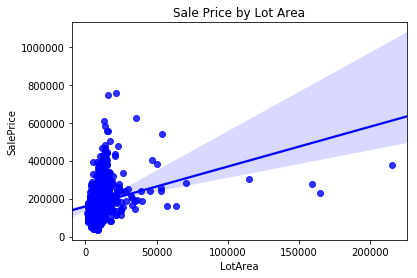

In [7]:
# We can create scatterplots that show the confidence interval!
# I think it should be international law that these are required on any
# linear regression graphs.

#sns.regplot(x='LotFrontage', y='SalePrice', data=df_num, color='blue').set_title('Sale Price by LotFrontage')
#sns.regplot(x='GrLivArea', y='SalePrice', data=df_num, color='blue').set_title('Sale Price by GrLivArea')
sns.regplot(x='LotArea', y='SalePrice', data=df_num, color='blue').set_title('Sale Price by Lot Area')

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

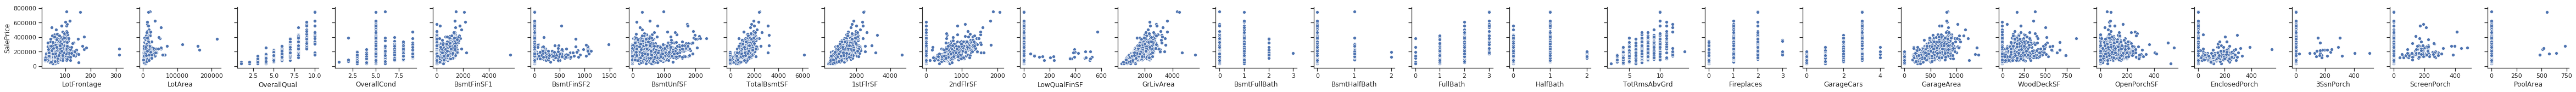

In [8]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df_num.columns.drop('SalePrice')

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=df, y_vars=['SalePrice'], x_vars=x_columns)

In [0]:
# Prepare X and y variables

X = df_num[["LotFrontage",
"LotArea",
"OverallQual",
"OverallCond",
"BsmtFinSF1",
"BsmtFinSF2",
"BsmtUnfSF",
"TotalBsmtSF",
"1stFlrSF",
"2ndFlrSF",
"GrLivArea",
"TotRmsAbvGrd",
"GarageArea",
"WoodDeckSF",
"OpenPorchSF",
"EnclosedPorch",
"ScreenPorch"]]

y = df_num['SalePrice']

In [10]:
# Use Statsmodels to run a regression

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     318.9
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        13:48:03   Log-Likelihood:                -17440.
No. Observations:                1460   AIC:                         3.491e+04
Df Residuals:                    1443   BIC:                         3.500e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.166e+05   8188.474    -14.238

## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.

Here features with high p values are listed below indicating there is no meaningful addition to the model. But needs to be verified.

|Feature       |Raw Data|
|--------------|--------|
|const         |0.000   |
|LotFrontage   |0.942   |
|LotArea       |0.000   |
|OverallQual   |0.000   |
|OverallCond   |0.023   |
|BsmtFinSF1    |0.000   |
|BsmtFinSF2    |0.954   |
|BsmtUnfSF     |0.463   |
|TotalBsmtSF   |0.000   |
|1stFlrSF      |0.007   |
|2ndFlrSF      |0.017   |
|GrLivArea     |0.591   |
|TotRmsAbvGrd  |0.190   |
|GarageArea    |0.000   |
|WoodDeckSF    |0.000   |
|OpenPorchSF   |0.647   |
|EnclosedPorch |0.010   |
|ScreenPorch   |0.016   |










## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [11]:
# # Lets remove outliers 

print(df_num.shape)

df_num = df_num[(np.abs(stats.zscore(df_num)) < 3).all(axis=1)]

print(df_num.shape)

(1460, 27)
(1084, 27)


In [0]:
# Prepare X and y variables

X = df_num[["LotFrontage",
"LotArea",
"OverallQual",
"OverallCond",
"BsmtFinSF1",
"BsmtFinSF2",
"BsmtUnfSF",
"TotalBsmtSF",
"1stFlrSF",
"2ndFlrSF",
"GrLivArea",
"TotRmsAbvGrd",
"GarageArea",
"WoodDeckSF",
"OpenPorchSF",
"EnclosedPorch",
"ScreenPorch"]]

y = df_num['SalePrice']

In [13]:
# Use Statsmodels to run a regression

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     401.8
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        13:48:03   Log-Likelihood:                -12483.
No. Observations:                1084   AIC:                         2.500e+04
Df Residuals:                    1067   BIC:                         2.508e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.455e+04   6890.045    -13.722

After removing the outliers there are some updates in the p-value in both direction.

|Feature       |Raw Data|Without Outliers|
|--------------|--------|----------------|
|const         |0.000   |0.000           |
|LotFrontage   |0.942   |0.007           |
|LotArea       |0.000   |0.001           |
|OverallQual   |0.000   |0.000           |
|OverallCond   |0.023   |0.013           |
|BsmtFinSF1    |0.000   |0.000           |
|BsmtFinSF2    |0.954   |0.412           |
|BsmtUnfSF     |0.463   |0.811           |
|TotalBsmtSF   |0.000   |0.000           |
|1stFlrSF      |0.007   |0.268           |
|2ndFlrSF      |0.017   |0.258           |
|GrLivArea     |0.591   |0.394           |
|TotRmsAbvGrd  |0.190   |0.240           |
|GarageArea    |0.000   |0.000           |
|WoodDeckSF    |0.000   |0.000           |
|OpenPorchSF   |0.647   |0.000           |
|EnclosedPorch |0.010   |0.004           |
|ScreenPorch   |0.016   |0.281           |


## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

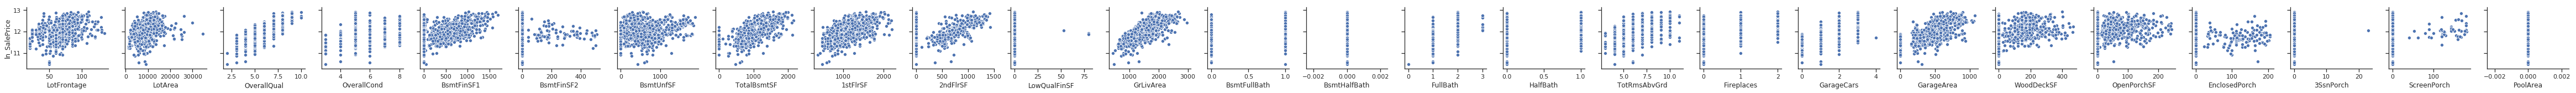

In [14]:
df_num['ln_SalePrice'] = np.log(df_num['SalePrice'])

sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df_num.columns.drop(['SalePrice','ln_SalePrice'])

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=df_num, y_vars=['ln_SalePrice'], x_vars=x_columns)

In [0]:
X = df_num[["LotFrontage",
"LotArea",
"OverallQual",
"OverallCond",
"BsmtFinSF1",
"BsmtFinSF2",
"BsmtUnfSF",
"TotalBsmtSF",
"1stFlrSF",
"2ndFlrSF",
"GrLivArea",
"TotRmsAbvGrd",
"GarageArea",
"WoodDeckSF",
"OpenPorchSF",
"EnclosedPorch",
"ScreenPorch"]]

y = df_num['ln_SalePrice']

In [16]:
# Use Statsmodels to run a regression

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ln_SalePrice   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     398.9
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        13:48:07   Log-Likelihood:                 591.06
No. Observations:                1084   AIC:                            -1148.
Df Residuals:                    1067   BIC:                            -1063.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.3570      0.040    259.981

|Feature       |Raw Data|Without Outliers|Log Linear|
|--------------|--------|----------------|----------|
|const         |0.000   |0.000           |0.000     |
|LotFrontage   |0.942   |0.007           |0.009     |
|LotArea       |0.000   |0.001           |0.000     |
|OverallQual   |0.000   |0.000           |0.000     |
|OverallCond   |0.023   |0.013           |0.000     |
|BsmtFinSF1    |0.000   |0.000           |0.000     |
|BsmtFinSF2    |0.954   |0.412           |0.575     |
|BsmtUnfSF     |0.463   |0.811           |0.975     |
|TotalBsmtSF   |0.000   |0.000           |0.000     |
|1stFlrSF      |0.007   |0.268           |0.779     |
|2ndFlrSF      |0.017   |0.258           |0.747     |
|GrLivArea     |0.591   |0.394           |0.954     |
|TotRmsAbvGrd  |0.190   |0.240           |0.394     |
|GarageArea    |0.000   |0.000           |0.000     |
|WoodDeckSF    |0.000   |0.000           |0.000     |
|OpenPorchSF   |0.647   |0.000           |0.000     |
|EnclosedPorch |0.010   |0.004           |0.000     |
|ScreenPorch   |0.016   |0.281           |0.162     |


## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['const', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch'],
      dtype='object') 


[86.06623977326318, 1.6713348779437738, 1.6907479031423882, 2.283974113741334, 1.0842604168943355, inf, inf, inf, inf, 5829.776968622857, 8836.73938356912, 9861.01684969049, 3.364709574366709, 1.7410982139054514, 1.1501812558490692, 1.2394484117762687, 1.0739597427688046, 1.0313661561256255]


/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


|Feature          | Variance Inflation Factor|
|-----------------|--------------------------|
|'const',         |86.06623977326318,        |
|'LotFrontage',   |1.6713348779437738,       |
|'LotArea',       |1.6907479031423882,       |
|'OverallQual',   |2.283974113741334,        |
|'OverallCond',   |1.0842604168943355,       |
|'BsmtFinSF1',    |inf,                      |
|'BsmtFinSF2',    |inf,                      |
|'BsmtUnfSF',     |inf,                      |
|'TotalBsmtSF',   |inf,                      |
|'1stFlrSF',      |5829.776968622857,        |
|'2ndFlrSF',      |8836.73938356912,         |
|'GrLivArea',     |9861.01684969049,         |
|'TotRmsAbvGrd',  |3.364709574366709,        |
|'GarageArea',    |1.7410982139054514,       |
|'WoodDeckSF',    |1.1501812558490692,       |
|'OpenPorchSF',   |1.2394484117762687,       |
|'EnclosedPorch', |1.0739597427688046,       |
|'ScreenPorch'    |1.0313661561256255]       |


In [0]:
X = df_num[['LotFrontage', 
'LotArea',      
'OverallQual',  
'OverallCond',
'TotRmsAbvGrd', 
'GarageArea',   
'WoodDeckSF',   
'OpenPorchSF',  
'EnclosedPorch',
'ScreenPorch']]

y = df_num['ln_SalePrice']


In [19]:
# Use Statsmodels to run a regression

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ln_SalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     444.4
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        13:48:07   Log-Likelihood:                 425.24
No. Observations:                1084   AIC:                            -828.5
Df Residuals:                    1073   BIC:                            -773.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.2700      0.044    231.568

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [0]:
X = df_num[["LotFrontage",
"LotArea",
"OverallQual",
"OverallCond",
"BsmtFinSF1",
"BsmtFinSF2",
"BsmtUnfSF",
"TotalBsmtSF",
"1stFlrSF",
"2ndFlrSF",
"GrLivArea",
"TotRmsAbvGrd",
"GarageArea",
"WoodDeckSF",
"OpenPorchSF",
"EnclosedPorch",
"ScreenPorch"]]

y = df_num['ln_SalePrice']

In [21]:
no_const = X
no_const.corr()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
LotFrontage,1.000000,0.584619,0.216221,-0.036860,0.151553,-0.019822,0.142783,0.320609,0.386149,0.039082,0.332267,0.329654,0.335228,0.120868,0.134417,-0.047250,0.041731
LotArea,0.584619,1.000000,0.139879,-0.056148,0.162690,0.000345,0.090286,0.276803,0.363513,0.081596,0.355502,0.354635,0.290797,0.159398,0.080069,-0.043241,0.056673
OverallQual,0.216221,0.139879,1.000000,-0.162837,0.182908,-0.131624,0.301557,0.512696,0.415345,0.288328,0.591743,0.405264,0.555892,0.272327,0.355440,-0.166596,-0.020652
OverallCond,-0.036860,-0.056148,-0.162837,1.000000,0.008718,0.073225,-0.145329,-0.141508,-0.140110,-0.050320,-0.155334,-0.117215,-0.175793,-0.033602,-0.090368,0.142358,0.101191
BsmtFinSF1,0.151553,0.162690,0.182908,0.008718,1.000000,0.019276,-0.576707,0.418102,0.338153,-0.183364,0.085566,-0.032062,0.239013,0.208090,0.044500,-0.110613,0.056776
BsmtFinSF2,-0.019822,0.000345,-0.131624,0.073225,0.019276,1.000000,-0.181628,0.010770,-0.013944,-0.081454,-0.087876,-0.085591,-0.038422,0.056112,-0.091683,-0.002923,0.041322
BsmtUnfSF,0.142783,0.090286,0.301557,-0.145329,-0.576707,-0.181628,1.000000,0.484179,0.363844,-0.039665,0.241658,0.238934,0.186001,0.007110,0.161476,-0.011062,-0.018819
TotalBsmtSF,0.320609,0.276803,0.512696,-0.141508,0.418102,0.010770,0.484179,1.000000,0.772773,-0.257320,0.349038,0.220526,0.459672,0.241779,0.213181,-0.131510,0.047481
1stFlrSF,0.386149,0.363513,0.415345,-0.140110,0.338153,-0.013944,0.363844,0.772773,1.000000,-0.332810,0.452177,0.341432,0.455878,0.207534,0.156540,-0.126496,0.064973
2ndFlrSF,0.039082,0.081596,0.288328,-0.050320,-0.183364,-0.081454,-0.039665,-0.257320,-0.332810,1.000000,0.690537,0.589456,0.134592,0.067044,0.227066,0.008172,-0.017414


1stFlrSF, 2ndFlrSF and GrLivArea have high correlation with other features.

|1stFlrSF	|2ndFlrSF	|GrLivArea	|
|-----------|-----------|-----------|
|0.320609	|0.386149	|0.039082	|
|0.276803	|0.363513	|0.081596	|
|0.512696	|0.415345	|0.288328	|
|-0.141508	|-0.140110	|-0.050320	|
|0.418102	|0.338153	|-0.183364	|
|0.010770	|-0.013944	|-0.081454	|
|0.484179	|0.363844	|-0.039665	|
|1.000000	|0.772773	|-0.257320	|
|0.772773	|1.000000	|-0.332810	|
|-0.257320	|-0.332810	|1.000000	|
|0.349038	|0.452177	|0.690537	|
|0.220526	|0.341432	|0.589456   |
|0.459672	|0.455878	|0.134592	|
|0.241779	|0.207534	|0.067044	|
|0.213181	|0.156540	|0.227066	|
|-0.131510	|-0.126496	|0.008172   |
|0.047481	|0.064973	|-0.017414	|

## 2.3 If you have variables with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

Handled as part of 2.1

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [0]:
X = df_num[['LotFrontage', 
'LotArea',      
'OverallQual',  
'OverallCond',
'TotRmsAbvGrd', 
'GarageArea',   
'WoodDeckSF',   
'OpenPorchSF',  
'EnclosedPorch',
'ScreenPorch']]

y = df_num['ln_SalePrice']

In [23]:
# Lets run our regression again using Robust Standard Errors
# cov_type='HC3' parameter to .fit() function

# Log-Linear Regression


# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ln_SalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     398.2
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        13:48:07   Log-Likelihood:                 425.24
No. Observations:                1084   AIC:                            -828.5
Df Residuals:                    1073   BIC:                            -773.6
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.2700      0.056    183.315

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

In [0]:
df_new = df_num[['LotFrontage', 
'LotArea',      
'OverallQual',  
'OverallCond',
'TotRmsAbvGrd', 
'GarageArea',   
'WoodDeckSF',   
'OpenPorchSF',  
'EnclosedPorch',
'ScreenPorch',
'ln_SalePrice']].copy()

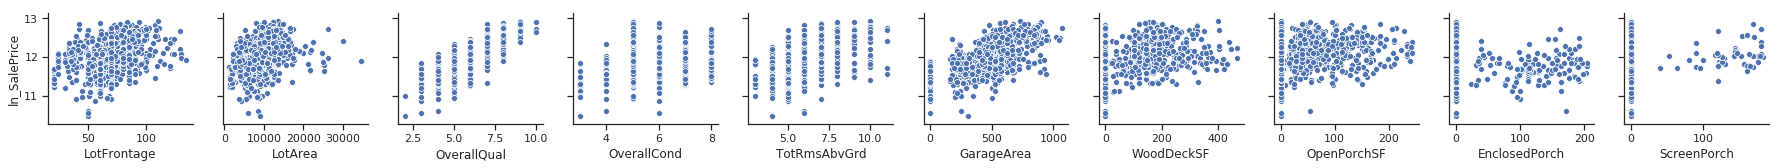

In [25]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df_new.columns.drop(['ln_SalePrice'])

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=df_new, y_vars=['ln_SalePrice'], x_vars=x_columns)

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

In [0]:
X = df_new[['LotFrontage', 
'LotArea',      
'OverallQual',  
'OverallCond',
'TotRmsAbvGrd', 
'GarageArea',   
'WoodDeckSF',   
'OpenPorchSF',  
'EnclosedPorch',
'ScreenPorch']]

y = df_new['ln_SalePrice']

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


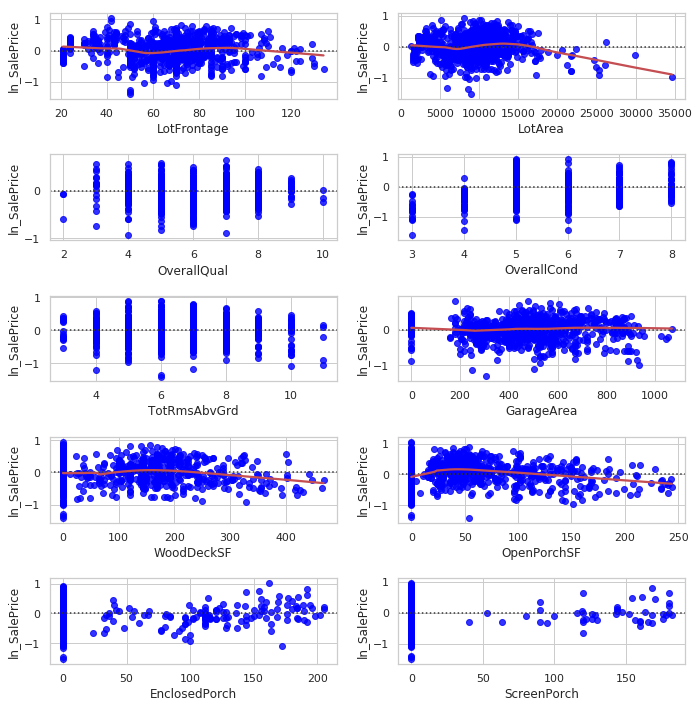

In [27]:
# There are 12 columns in X
sns.set(style="whitegrid")

fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(10,10));

# Positions in the array of axes that I just made
position_list = []
for i in range(5):
    for j in range(2):
        position_list.append((i,j))
        
for col, pos in zip(X.columns, position_list):
    sns.residplot(X[col], y, lowess=True, color="r", ax=axs[pos[0]][pos[1]],
                  scatter_kws={'color':'blue'})
plt.tight_layout()

## 2.7 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [0]:
df_new['LotFrontage_sq'] = df_new['LotFrontage']**2
df_new['LotArea_sq'] = df_new['LotArea']**2
df_new['WoodDeckSF_sq'] = df_new['WoodDeckSF']**2
df_new['OpenPorchSF_sq'] = df_new['OpenPorchSF']**2

In [0]:
X = df_new.drop(columns='ln_SalePrice')

y = df_new['ln_SalePrice']

In [31]:
# Lets run our regression again using Robust Standard Errors
# cov_type='HC3' parameter to .fit() function

# Log-Linear Regression


# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ln_SalePrice   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     290.1
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        13:49:09   Log-Likelihood:                 431.51
No. Observations:                1084   AIC:                            -833.0
Df Residuals:                    1069   BIC:                            -758.2
Df Model:                          14                                         
Covariance Type:                  HC3                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.1973      0.065    157.

# Stretch Goals

- Research the assumptions that are required for OLS to be BLUE the "Best Linear Unbiased Estimator". You might try searching and trying to understand the conditions of what's called the Gauss-Markov Theorem.
- Research other Diagnostic tests. Can you show that residuals are normally distributed graphically?
- Study for the sprint challenge!
- Write a blog post about iferential modeling using linear regression.